In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import cartopy.crs as ccrs   # map plots
from e3sm_utils import cmclimate
cmap_prect = cmclimate.cm.WhiteBlueGreenYellowRed
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.feature as cfeature
import matplotlib.patches as mpatches

# omega 500

In [2]:
ds = xr.open_dataset('/global/cscratch1/sd/crjones/era5/era5_omega500_2000-01.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 744)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2000-01-01 ... 2000-01-31T23:00:00
Data variables:
    w          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-05-20 17:13:33 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

In [3]:
ds['w'].attrs

OrderedDict([('units', 'Pa s**-1'),
             ('long_name', 'Vertical velocity'),
             ('standard_name', 'lagrangian_tendency_of_air_pressure')])

In [6]:
mmf_2d = xr.open_mfdataset('/global/project/projectdirs/m3312/crjones/e3sm/early_science/hourly_2d_hist/earlyscience.FC5AV1C-H01A.ne120.sp1_64x1_1000m.20190222.cam.h1.0001-01*.nc')
mmf_2d

<xarray.Dataset>
Dimensions:       (ilev: 73, lev: 72, nbnd: 2, ncol: 777602, time: 840)
Coordinates:
  * lev           (lev) float64 0.1238 0.1828 0.2699 ... 986.2 993.8 998.5
  * ilev          (ilev) float64 0.1 0.1477 0.218 0.3219 ... 990.5 997.0 1e+03
  * time          (time) object 0001-01-01 00:00:00 ... 0001-02-04 23:00:00
Dimensions without coordinates: nbnd, ncol
Data variables:
    lat           (time, ncol) float64 dask.array<shape=(840, 777602), chunksize=(120, 777602)>
    lon           (time, ncol) float64 dask.array<shape=(840, 777602), chunksize=(120, 777602)>
    area          (time, ncol) float64 dask.array<shape=(840, 777602), chunksize=(120, 777602)>
    hyam          (time, lev) float64 dask.array<shape=(840, 72), chunksize=(120, 72)>
    hybm          (time, lev) float64 dask.array<shape=(840, 72), chunksize=(120, 72)>
    P0            (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyai          (time, ilev) float64 dask.array<shape=(840, 73), c

In [4]:
mmf = xr.open_mfdataset('/global/project/projectdirs/m3312/crjones/e3sm/early_science/3hourly_3d_hist/earlyscience.FC5AV1C-H01A.ne120.sp1_64x1_1000m.20190222.cam.h2.0001-01*.nc')
print(mmf)

<xarray.Dataset>
Dimensions:       (ilev: 73, lev: 72, nbnd: 2, ncol: 777602, time: 266)
Coordinates:
  * lev           (lev) float64 0.1238 0.1828 0.2699 ... 986.2 993.8 998.5
  * ilev          (ilev) float64 0.1 0.1477 0.218 0.3219 ... 990.5 997.0 1e+03
  * time          (time) object 0001-01-01 00:00:00 ... 0001-02-03 03:00:00
Dimensions without coordinates: nbnd, ncol
Data variables:
    lat           (time, ncol) float64 dask.array<shape=(266, 777602), chunksize=(40, 777602)>
    lon           (time, ncol) float64 dask.array<shape=(266, 777602), chunksize=(40, 777602)>
    area          (time, ncol) float64 dask.array<shape=(266, 777602), chunksize=(40, 777602)>
    hyam          (time, lev) float64 dask.array<shape=(266, 72), chunksize=(40, 72)>
    hybm          (time, lev) float64 dask.array<shape=(266, 72), chunksize=(40, 72)>
    P0            (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyai          (time, ilev) float64 dask.array<shape=(266, 73), chunks

In [5]:
mmf['OMEGA'].lev

<xarray.DataArray 'lev' (lev: 72)>
array([1.238254e-01, 1.828292e-01, 2.699489e-01, 3.985817e-01, 5.885091e-01,
       8.689386e-01, 1.282995e+00, 1.894352e+00, 2.797027e+00, 4.129833e+00,
       5.968449e+00, 8.377404e+00, 1.147379e+01, 1.533394e+01, 1.999634e+01,
       2.544470e+01, 3.159325e+01, 3.836628e+01, 4.567120e+01, 5.330956e+01,
       6.101518e+01, 6.847639e+01, 7.535534e+01, 8.194628e+01, 8.891054e+01,
       9.646667e+01, 1.046650e+02, 1.135600e+02, 1.232110e+02, 1.336822e+02,
       1.450433e+02, 1.573699e+02, 1.707441e+02, 1.852549e+02, 2.009989e+02,
       2.180810e+02, 2.366148e+02, 2.567237e+02, 2.785416e+02, 3.022136e+02,
       3.278975e+02, 3.557641e+02, 3.859990e+02, 4.188035e+02, 4.543958e+02,
       4.924686e+02, 5.316395e+02, 5.706249e+02, 6.086438e+02, 6.453200e+02,
       6.804980e+02, 7.137046e+02, 7.444748e+02, 7.723628e+02, 7.969527e+02,
       8.178688e+02, 8.350952e+02, 8.496612e+02, 8.631764e+02, 8.763706e+02,
       8.892227e+02, 9.017118e+02, 9.1381

In [ ]:
# version1: naively regrid using griddat

# tlwp

In [2]:
ds = xr.open_dataset('/global/cscratch1/sd/crjones/adaptor.mars.internal-1556316899.9524786-4125-1-afdbf8a4-2e1d-46d6-adb8-265e47df2fa1.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 744)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2000-01-01 ... 2000-01-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    hcc        (time, latitude, longitude) float32 ...
    lcc        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    mcc        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
    tciw       (time, latitude, longitude) float32 ...
    tclw       (time, latitude, longitude) float32 ...
    tcrw       (time, latitude, longitude) float32 ...
    tp 

In [3]:
ds_mmf = xr.open_mfdataset('/global/project/projectdirs/m3312/crjones/e3sm/early_science/hourly_2d_hist/remap/daily/earlyscience.FC5AV1C-H01A.ne120.sp1_64x1_1000m.cam.h1.0002-01-*.nc')
ds_mmf

<xarray.Dataset>
Dimensions:       (ilev: 73, lat: 720, lev: 72, lon: 1440, nbnd: 2, time: 744)
Coordinates:
  * lat           (lat) float64 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon           (lon) float64 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * ilev          (ilev) float64 0.1 0.1477 0.218 0.3219 ... 990.5 997.0 1e+03
  * lev           (lev) float64 0.1238 0.1828 0.2699 ... 986.2 993.8 998.5
  * time          (time) object 0002-01-01 00:00:00 ... 0002-01-31 23:00:00
Dimensions without coordinates: nbnd
Data variables:
    lat_bnds      (lat, nbnd, time) float64 dask.array<shape=(720, 2, 744), chunksize=(720, 2, 24)>
    lon_bnds      (lon, nbnd, time) float64 dask.array<shape=(1440, 2, 744), chunksize=(1440, 2, 24)>
    gw            (lat, time) float64 dask.array<shape=(720, 744), chunksize=(720, 24)>
    area          (lat, lon, time) float64 dask.array<shape=(720, 1440, 744), chunksize=(720, 1440, 24)>
    FLNS          (lat, lon, time) float32 dask.array<shape=

In [19]:
def plot_frame(i, das=(ds['tclw'], ds_mmf['TGCLDLWP']), axes=None, vmin=0, vmax=1.75,
               cbar_kwargs={'orientation': 'horizontal', 'pad': 0.05, 'aspect': 50},
               **plot_kwargs):
    if axes is None:
        fig, axes = plt.subplots(1, len(das), figsize=(16, 12), subplot_kw={'projection': ccrs.PlateCarree()})
    for da, ax in zip(das, axes):
        da.isel(time=i).plot(ax=ax, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax,
                             cbar_kwargs=cbar_kwargs, **plot_kwargs)
        ax.coastlines()
        ax.set_global()

In [22]:
def save_frame(i, axes=None, out_prefix='es_lwp', topdir='/global/cscratch1/sd/crjones/figs/'):
    """Plot hourly snapshots of plotvar for given date and save to file"""
    out_name = '_'.join([out_prefix, str(i).zfill(3)])
    plot_frame(i, axes=axes, cmap=plt.cm.Blues)
    plt.savefig(topdir + out_name + '.png', dpi=600, bbox_inches='tight')
    plt.close()

In [ ]:
for i in range(len(ds['tclw'].time)):
    save_frame(i, axes=None)

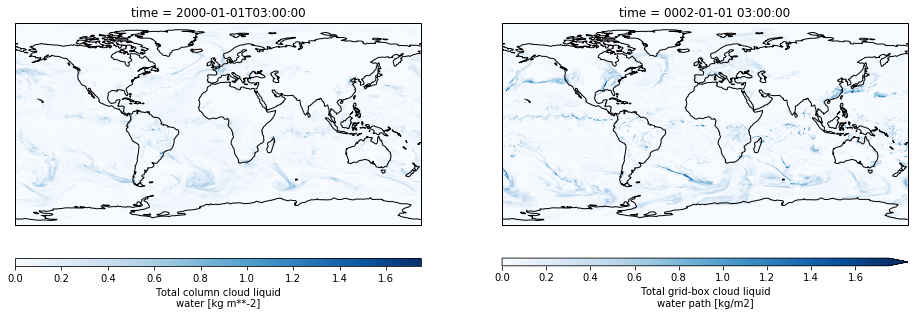

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 12), subplot_kw={'projection': ccrs.PlateCarree()})
plot_frame(3, axes=axes, cmap=plt.cm.Blues)

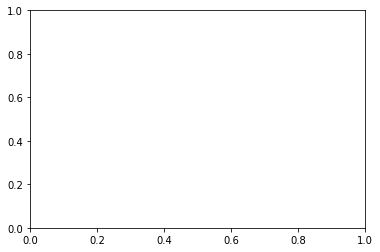

In [16]:
plot_frame(4, axes=axes, cmap=plt.cm.Blues)
plt.show()

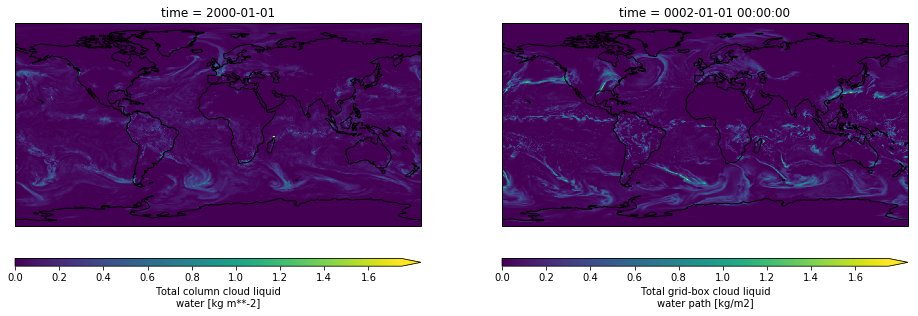

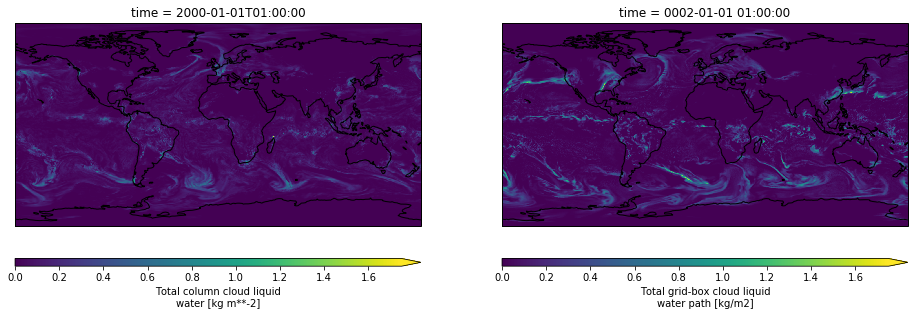

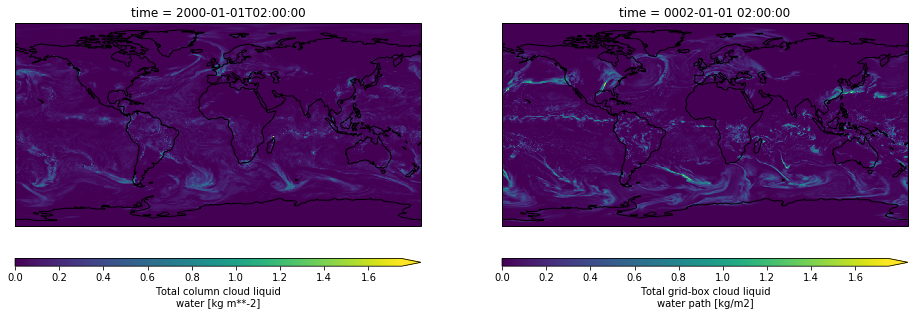

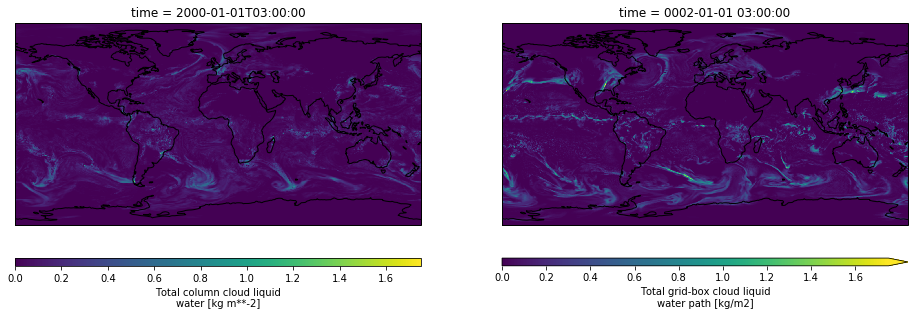

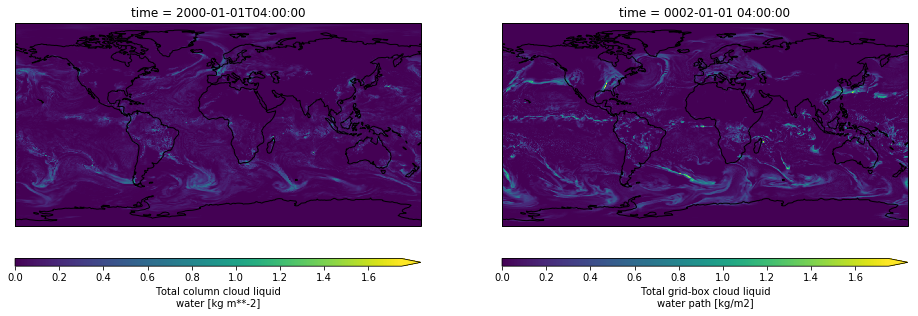

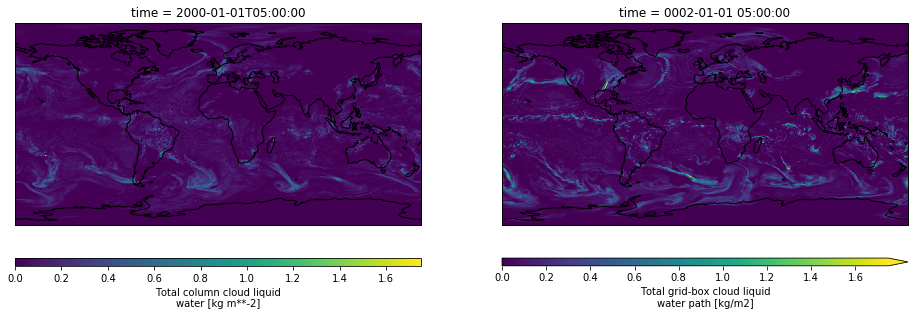

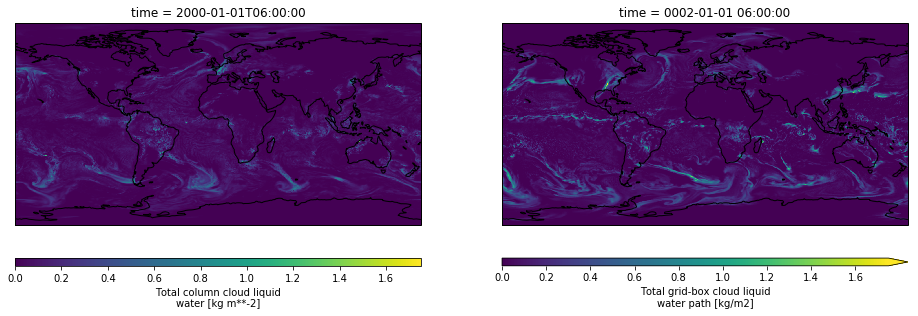

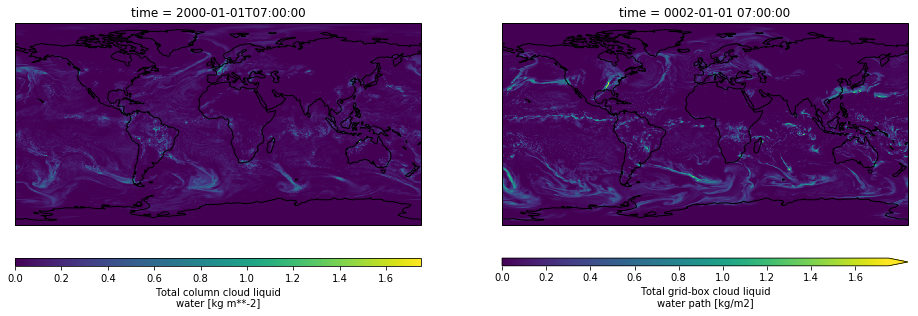

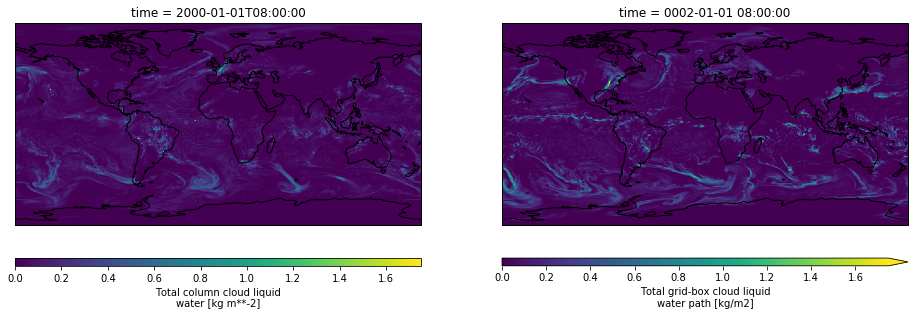

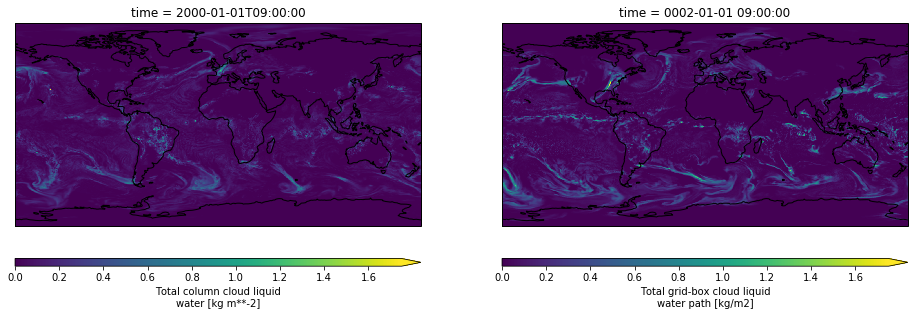

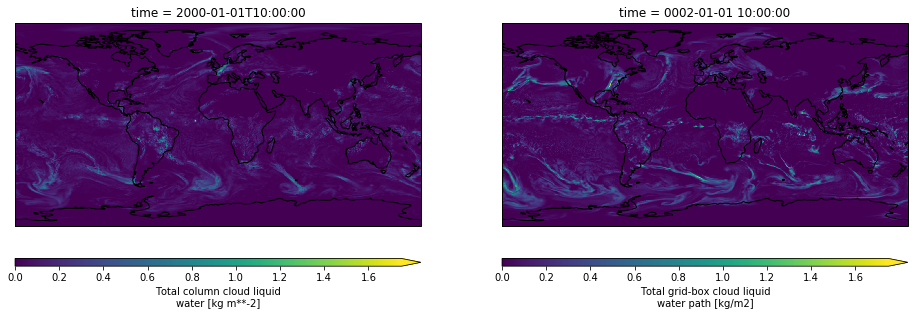

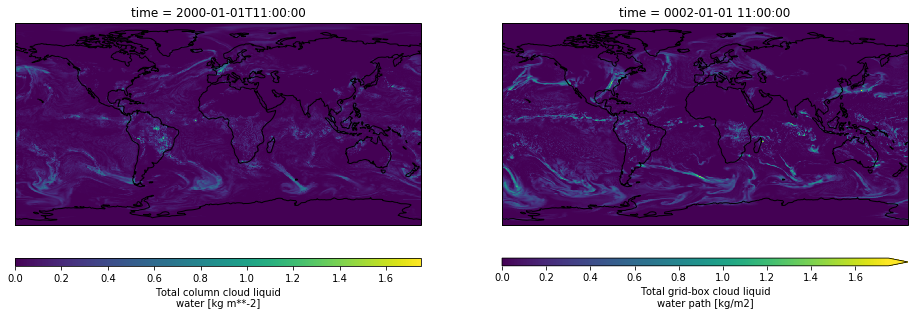

In [11]:
for i in range(12):
    fig, axes = plt.subplots(1, 2, figsize=(16, 12), subplot_kw={'projection': ccrs.PlateCarree()})
    ds['tclw'].isel(time=i).plot(ax=axes[0], transform=ccrs.PlateCarree(),
                                 vmin=0, vmax=1.75, cbar_kwargs={'orientation': 'horizontal', 'pad': 0.05, 'aspect': 50})
    ds_mmf['TGCLDLWP'].isel(time=i).plot(ax=axes[1], transform=ccrs.PlateCarree(),
                                         vmin=0, vmax=1.75, cbar_kwargs={'orientation': 'horizontal', 'pad': 0.05, 'aspect': 50})
    for ax in axes:
        ax.coastlines()
        ax.set_global()

In [2]:
ds = xr.open_mfdataset('/global/project/projectdirs/m3312/crjones/e3sm/early_science/hourly_2d_hist/remap/daily/earlyscience.FC5AV1C-H01A.ne120.sp1_64x1_1000m.cam.h1.000*-0[5-8]-*.nc')

In [4]:
prect = ds['PRECT']

In [8]:
prect_hrly = prect.groupby('time.hour').mean(dim='time').load()

In [7]:
prect_hrly

<xarray.DataArray 'PRECT' (lat: 720, lon: 1440, hour: 24)>
dask.array<shape=(720, 1440, 24), dtype=float32, chunksize=(720, 1440, 1)>
Coordinates:
  * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * hour     (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23

In [17]:
local_time = prect_hrly.hour - 6

/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


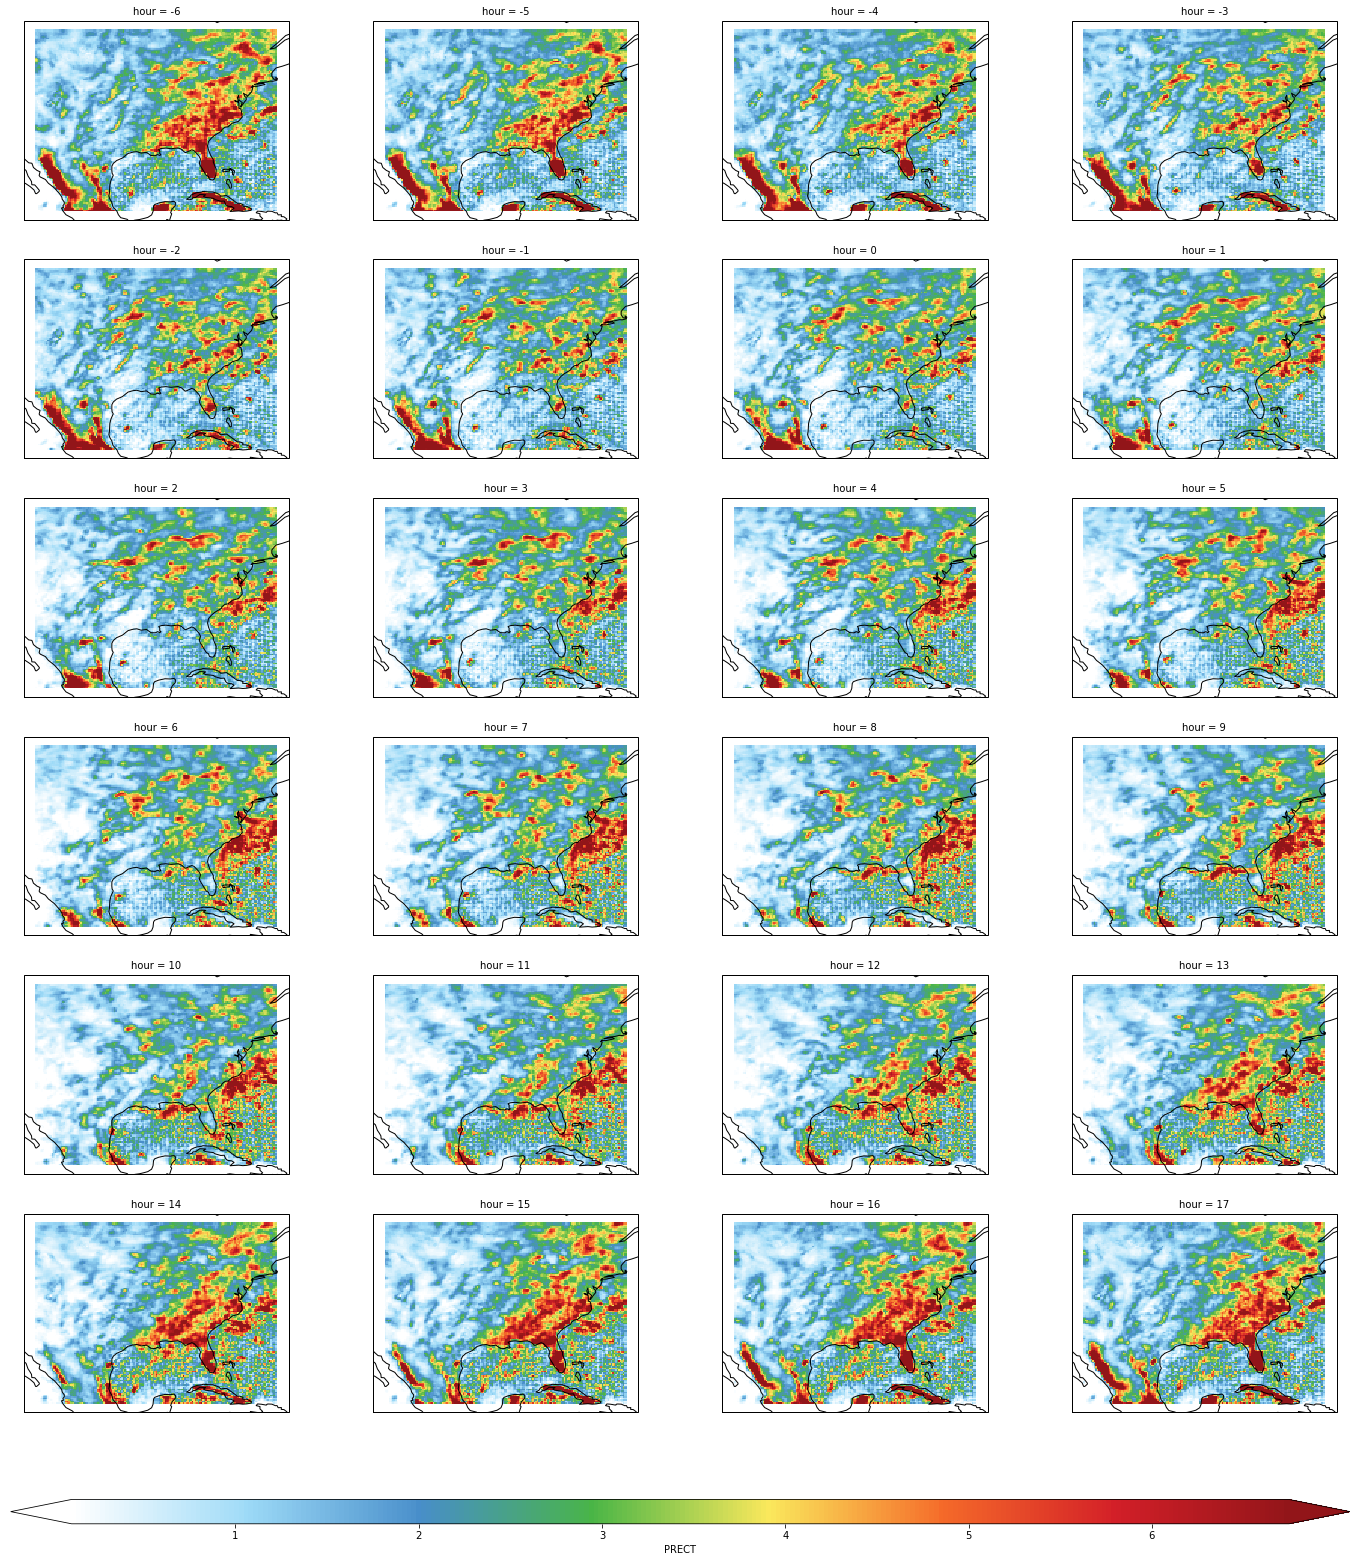

In [18]:
p = (86400 * 1000 * prect_hrly).assign_coords(hour=local_time).sel(lat=slice(20, 50), lon=slice(250, 290)).plot(x='lon', y='lat', col='hour', col_wrap=4, figsize=(24, 32),
                                                               subplot_kws={'projection': ccrs.PlateCarree()}, 
                                                               transform=ccrs.PlateCarree(), cmap=cmap_prect, 
                                                               robust=True,
                                                               cbar_kwargs={'orientation': 'horizontal', 'pad': 0.05, 'aspect': 50})
for ax in p.axes.flat:
    ax.coastlines()